# Optimización - Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.normal(loc=0,scale=1,size=(200,1))

array([[-1.11898588e+00],
       [-4.09375207e-01],
       [ 9.10998079e-01],
       [ 8.49633497e-01],
       [-2.50102851e-01],
       [ 2.01039230e-01],
       [ 3.95076509e-01],
       [-9.81887415e-01],
       [ 6.76289150e-01],
       [ 5.29200225e-01],
       [ 2.10027218e-01],
       [-9.50608107e-01],
       [ 3.92127687e-01],
       [ 5.37990868e-01],
       [-7.13644197e-01],
       [-4.66093757e-01],
       [-4.40026557e-01],
       [ 5.39585470e-01],
       [-8.40435616e-01],
       [ 3.96965397e-01],
       [-3.87440627e-01],
       [ 4.83680390e-01],
       [-3.98904799e-03],
       [-2.81246961e-01],
       [-1.69962183e+00],
       [ 1.01661098e+00],
       [ 7.78090669e-01],
       [-1.34806528e-01],
       [ 8.18081197e-01],
       [-2.75053256e-01],
       [-6.44232279e-01],
       [ 9.17581340e-01],
       [-6.68221924e-01],
       [-1.25760144e+00],
       [ 1.07767614e-01],
       [-4.89675908e-01],
       [ 6.20287207e-01],
       [ 1.04700711e+00],
       [-1.7

In [3]:
x = np.linspace(-2,2,50).reshape(50,1)
y = 1 + 2*x + np.random.normal(loc=0,scale=1,size=(50,1))

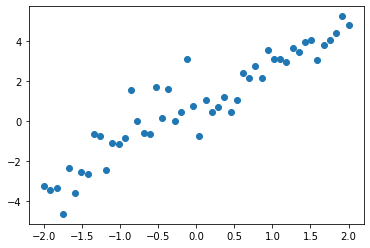

In [4]:
plt.scatter(x,y)
plt.show()

# Ejercicio 1

## 1.a Dado el dataset anterior, calcular la forma cerrada de una regresión lineal considerando la ordenada al origen. 

$$w^* = (X^TX)^{-1} X^Ty $$

In [5]:
def regresion_lineal(x,y,ti=True):
    if ti:
        a = np.ones((x.shape[0],1))
        x_aug = np.hstack((a,x))
    else:
        x_aug = x
    x_inv = np.linalg.pinv(x_aug.T @ x_aug)
    w = x_inv @ x_aug.T @ y
    return w

In [6]:
w = regresion_lineal(x,y,True)
w.shape

(2, 1)

## 1.b Calcular las predicciones sobre el dataset original

$$\hat{y}= X w^* $$

In [7]:
x.shape

(50, 1)

In [8]:
xaug = np.array([x.reshape(50,)**0,x.reshape(50,)**1]).T

In [9]:
xaug.shape

(50, 2)

In [10]:
w.shape

(2, 1)

In [11]:
yhat = xaug@w

In [12]:
yhat.shape

(50, 1)

## 1.c Calcular el error de las predicciones

$$ e = y - \hat{y}$$

In [13]:
e = y - yhat

## 1.d Computar el valor del gradiente

\begin{align}
     \nabla_w J(w) &= \nabla_w \Big( \sum_{i} (y_i - X_i W)^2 \Big) \\
     &= \sum_{i} \Big( \nabla_w (y_i - X_i W)^2 \Big) \\
    &=  \sum_i \Big( \nabla_w (y_i - (x_{i1}w_1 + x_{i2}w_2+ \cdots + x_{im}w_m))^2 \Big)\\
    &=  \sum_i \Big( -2 (y_i - \hat{y}_i) x_{ij} \Big) \hspace{1cm} \forall j \in (1 \cdots m)\\
    &= \begin{bmatrix} \sum_i \Big( -2 (y_i - \hat{y}_i) x_{i1} \Big) \\ \vdots \\ \sum_i \Big( -2 (y_i - \hat{y}_i) x_{im} \Big) \end{bmatrix}
\end{align}

In [14]:
grad1 = np.sum(-2*e*x)

In [15]:
grad1

-4.707345624410664e-14

In [16]:
x.shape

(50, 1)

# Ejercicio 2

# 2.a Implementar gradient descent con Numpy

for *epoch* in **n_epochs**:
1. Calcular las predicciones para todas las muestras $\hat{y}$
2. Calcular el error entre la salida real y las predicciones.
3. Calcular el gradiente usando todas las muestras.
4. Actualizar todos los parámetros del modelo.

In [26]:
# Ejercicio: Implementar GD vectorizado en NumPy
def gradient_descent(X_train, y_train, lr=0.01, epochs=100):
    # Inicializar parámetros
    nfeat = X_train.shape[1]
    w = np.random.normal(3,5,nfeat).reshape(nfeat,1)
    for i in range(epochs):
        # Calcular predicciones
        yhat = X_train @ w
        # Calcular error
        e = y_train - yhat
        # Calcular gradientes
        dw = (np.sum(-2*e*X_train,axis=0)/len(X_train)).reshape(2,1)
        # Actualizar parámetros
        w -= lr*dw
    return w

In [32]:
#%%timeit
w1 = gradient_descent(xaug,y)
print(w1)

[[0.72185094]
 [1.88728972]]


# 2.b Implementar Stochastic Gradient Descent con Numpy

for *epoch* in **n_epochs**:
* Mezclar las muestras (shuffle)
* for *sample* in **n_samples**:
    1. Calcular la predicción para la muestra $\hat{y_{i}}$
    2. Calcular el error entre la salida real y la predicción.
    3. Calcular el gradiente usando la muestra.
    4. Actualizar todos los parámetros del modelo.

In [45]:
def stochastic_gradient_descent(X_train, y_train, lr=0.01, epochs=100):
    
    # Inicializar parámetros
    nfeat = X_train.shape[1]
    w = np.random.normal(3,5,nfeat).reshape(nfeat,1)
    
    # Iterate over the n_epochs
    for epoch in range(epochs):

        # Mezclar muestras / Tomar índices aleatorios
        idx = np.random.permutation(X_train.shape[0])
        X_train = X_train[idx]
        y_train = y_train[idx]

        # Iterar sobre el dataset aplicando GD
        for sample in range(X_train.shape[0]):
            # Calcular predicciones
            yhat = X_train[sample] @ w
            # Calcular error
            e = y_train[sample] - yhat
            # Calcular gradientes
            dw = (np.sum(-2*e*X_train[sample],axis=0)/len(X_train))
            # Actualizar parámetros
            w -= lr*dw
    return w


In [46]:
#%%timeit
w2 = stochastic_gradient_descent(xaug,y)
print(w2)

[[-1.45939626]
 [ 3.68368438]]


## 2.c Implementar Mini-Batch Gradient Descent con Numpy

for *epoch* in **n_epochs**:
* Mezclar los **batches** (shuffle)
* for *batch* in **n_batches**:
    1. Calcular las predicciones para el batch $\hat{y_{batch}}$
    2. Calcular el error entre las salidas reales del batch y las predicciones.
    3. Calcular el gradiente para el batch.
    4. Actualizar todos los parámetros del modelo.

In [ ]:
def mini_batch_gradient_descent(X_train, y_train, lr=0.01, epochs=100, batch_size=16):
    

    # Inicializar parámetros
   
    # Iterar las epochs
    for i in range(epochs):
        
        # Mezclar samples / Índices aleatorios 

 
        # Iterar sobre los batches
        
        for i ...:
            # Implementar Gradient Descent tomando los "tramos" de 
            # dataset correspondientes al batch

    return W

# Ejercicio 3

## 3.a Calcular los pesos con los tres algoritmos. Comparar los resultados entre sí y con la solución cerrada

## 3.b Computar los tiempos de ejecución de los cuatro métodos y comparar. 

Utilizar %%timeit. Para más información ejecutar %%timeit?

In [ ]:
# Ejemplo de timeit
%%timeit -n 1000 -r 5 
11 - 2